EV Market Analytics — Exploratory Data Analysis

Project: Global EV Market & Charging Infrastructure Analysis  
Author:Shivani Chhabra

Date:February 2026  
Dataset: 5,000 records across 10 countries, 4 regions, 10 brands  
** Project Overview**

This analysis explores the global electric vehicle market using comprehensive data on:
- **EV Sales** across different markets
- **Charging Infrastructure** availability
- **Technical Specifications** (battery, range, charging time)
- **Government Incentives** impact on adoption
- **Environmental Impact** (CO₂ reduction)

##1. Import Libraries

We'll use the following Python libraries for our analysis:

| Library | Purpose |
|---------|---------|
| **pandas** | Data manipulation and analysis |
| **numpy** | Numerical computing and array operations |
| **matplotlib** | Basic visualization and plotting |
| **seaborn** | Statistical data visualization |
| **scipy** | Scientific computing and statistical tests |
| **sklearn** | Machine learning and preprocessing |

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## 2. Load and Preview Data

Loading the EV market dataset and performing initial inspection to understand:
- Data structure and dimensions
- Column names and data types
- Sample records from the beginning and end
- Basic information about the dataset

In [ ]:
df = pd.read_csv("/global_ev_market_charging_infrastructure_2026.csv")
df

,record_id,country,region,ev_brand,vehicle_type,ev_sales_units,battery_capacity_kwh,vehicle_range_km,charging_time_hours,charging_stations,avg_ev_price_usd,energy_consumption_kwh,govt_incentives,market_adoption_rate,co2_reduction_mt,year
0,EV0001,China,Asia,Mercedes,Bus,459155,42,285,1.21,127224,77023,17.7,Yes,32.9,255.9,2026
1,EV0002,Canada,North America,Hyundai,Car,722074,50,330,0.52,112274,69502,23.3,Yes,60.1,155.1,2026
2,EV0003,Australia,Oceania,Ford,Bus,241638,105,483,2.41,76749,33908,14.0,Yes,27.7,161.6,2026
3,EV0004,China,Asia,Toyota,Car,681021,116,472,1.53,64238,57502,17.5,Yes,40.1,246.3,2026
4,EV0005,Canada,North America,Ford,SUV,714686,114,485,2.07,135149,58145,16.1,No,54.5,21.2,2026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EV4996,China,Asia,Mercedes,Car,478082,104,356,2.83,7186,68462,12.7,Yes,26.6,18.9,2026
4996,EV4997,India,Asia,Toyota,SUV,91997,62,523,2.93,104533,56637,20.9,Yes,36.2,268.5,2026
4997,EV4998,India,Asia,Ford,Bus,430273,58,295,2.58,74298,28237,18.8,Yes,49.1,265.4,2026
4998,EV4999,United States,North America,Toyota,Bus,463973,91,532,1.67,194384,26366,15.7,Yes,36.0,157.8,2026


In [ ]:
df.head()

,record_id,country,region,ev_brand,vehicle_type,ev_sales_units,battery_capacity_kwh,vehicle_range_km,charging_time_hours,charging_stations,avg_ev_price_usd,energy_consumption_kwh,govt_incentives,market_adoption_rate,co2_reduction_mt,year
0,EV0001,China,Asia,Mercedes,Bus,459155,42,285,1.21,127224,77023,17.7,Yes,32.9,255.9,2026
1,EV0002,Canada,North America,Hyundai,Car,722074,50,330,0.52,112274,69502,23.3,Yes,60.1,155.1,2026
2,EV0003,Australia,Oceania,Ford,Bus,241638,105,483,2.41,76749,33908,14.0,Yes,27.7,161.6,2026
3,EV0004,China,Asia,Toyota,Car,681021,116,472,1.53,64238,57502,17.5,Yes,40.1,246.3,2026
4,EV0005,Canada,North America,Ford,SUV,714686,114,485,2.07,135149,58145,16.1,No,54.5,21.2,2026


In [ ]:
df.tail()

,record_id,country,region,ev_brand,vehicle_type,ev_sales_units,battery_capacity_kwh,vehicle_range_km,charging_time_hours,charging_stations,avg_ev_price_usd,energy_consumption_kwh,govt_incentives,market_adoption_rate,co2_reduction_mt,year
4995,EV4996,China,Asia,Mercedes,Car,478082,104,356,2.83,7186,68462,12.7,Yes,26.6,18.9,2026
4996,EV4997,India,Asia,Toyota,SUV,91997,62,523,2.93,104533,56637,20.9,Yes,36.2,268.5,2026
4997,EV4998,India,Asia,Ford,Bus,430273,58,295,2.58,74298,28237,18.8,Yes,49.1,265.4,2026
4998,EV4999,United States,North America,Toyota,Bus,463973,91,532,1.67,194384,26366,15.7,Yes,36.0,157.8,2026
4999,EV5000,Canada,North America,Hyundai,Car,22494,73,543,2.86,40703,36461,23.7,No,63.7,296.0,2026


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   record_id               5000 non-null   object 
 1   country                 5000 non-null   object 
 2   region                  5000 non-null   object 
 3   ev_brand                5000 non-null   object 
 4   vehicle_type            5000 non-null   object 
 5   ev_sales_units          5000 non-null   int64  
 6   battery_capacity_kwh    5000 non-null   int64  
 7   vehicle_range_km        5000 non-null   int64  
 8   charging_time_hours     5000 non-null   float64
 9   charging_stations       5000 non-null   int64  
 10  avg_ev_price_usd        5000 non-null   int64  
 11  energy_consumption_kwh  5000 non-null   float64
 12  govt_incentives         5000 non-null   object 
 13  market_adoption_rate    5000 non-null   float64
 14  co2_reduction_mt        5000 non-null   

In [ ]:
df.describe()

,ev_sales_units,battery_capacity_kwh,vehicle_range_km,charging_time_hours,charging_stations,avg_ev_price_usd,energy_consumption_kwh,market_adoption_rate,co2_reduction_mt,year
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,450391.774000,79.753800,450.278000,1.742614,100851.553400,55633.191800,18.527740,34.848660,153.196280,2026.0
std,258494.794603,23.474791,116.325407,0.719029,56905.671677,17289.560508,3.749015,17.276752,84.829245,0.0
min,5142.000000,40.000000,250.000000,0.500000,574.000000,25000.000000,12.000000,5.000000,5.100000,2026.0
25%,224814.000000,59.000000,349.000000,1.120000,52215.500000,40567.750000,15.300000,19.800000,80.000000,2026.0
50%,455096.500000,79.000000,451.000000,1.730000,100946.000000,56057.000000,18.450000,34.800000,152.850000,2026.0
75%,673542.000000,100.000000,550.000000,2.360000,149655.250000,70821.500000,21.800000,49.600000,228.425000,2026.0
max,899978.000000,120.000000,650.000000,3.000000,199969.000000,84999.000000,25.000000,65.000000,300.000000,2026.0


In [ ]:
df.shape

(5000, 16)

In [ ]:
df.dtypes

,0
record_id,object
country,object
region,object
ev_brand,object
vehicle_type,object
ev_sales_units,int64
battery_capacity_kwh,int64
vehicle_range_km,int64
charging_time_hours,float64
charging_stations,int64


3. DATA CLEANING OR QUALITY ASSESSMENT

In [ ]:
df.isnull().sum()

,0
record_id,0
country,0
region,0
ev_brand,0
vehicle_type,0
ev_sales_units,0
battery_capacity_kwh,0
vehicle_range_km,0
charging_time_hours,0
charging_stations,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
record_id,5000
country,10
region,4
ev_brand,10
vehicle_type,4
ev_sales_units,4987
battery_capacity_kwh,81
vehicle_range_km,401
charging_time_hours,251
charging_stations,4941


---

##4. Univariate Analysis — EV Sales Distribution

This analysis will reveal:
- **Central Tendency:** Mean, median (where's the "typical" value?)
- **Spread:** Standard deviation, IQR (how much variation?)
- **Distribution Shape:** Skewness, min/max (is it normal or skewed?)
- **Outliers:** Using IQR method to identify extreme values

In [ ]:
sales = df['ev_sales_units']
sales

,ev_sales_units
0,459155
1,722074
2,241638
3,681021
4,714686
...,...
4995,478082
4996,91997
4997,430273
4998,463973


In [ ]:
sales.mean()

np.float64(450391.774)

In [ ]:
sales.median()

455096.5

In [ ]:
sales.std()

258494.7946033617

In [ ]:
sales.min()

5142

In [ ]:
sales.max()

899978

In [ ]:
sales.quantile(0.25)

np.float64(224814.0)

In [ ]:
sales.quantile(0.75)

np.float64(673542.0)

In [ ]:
IQR = sales.quantile(0.75) - sales.quantile(0.25)
IQR

np.float64(448728.0)

In [ ]:
sales.skew()

np.float64(0.000736214267708064)

**Statistical Summary:**
- **Mean:** ~450,391 units (average market size)
- **Median:** ~455,096 units (typical market)
- **Std Dev:** ~258,495 units (high variability between markets)
- **IQR:** ~448,728 units (middle 50% range)
- **Skewness:** Near 0 (relatively symmetric distribution)

**Interpretation:**
1.  **Large variation**
2.  **Symmetric distribution** — suggests balanced global market
3.  **No extreme outliers** — all markets within reasonable range

---

In [ ]:
df['country'].value_counts()


,count
country,
Canada,541
India,512
Australia,509
Japan,503
China,500
Norway,499
United States,498
France,492
Germany,481


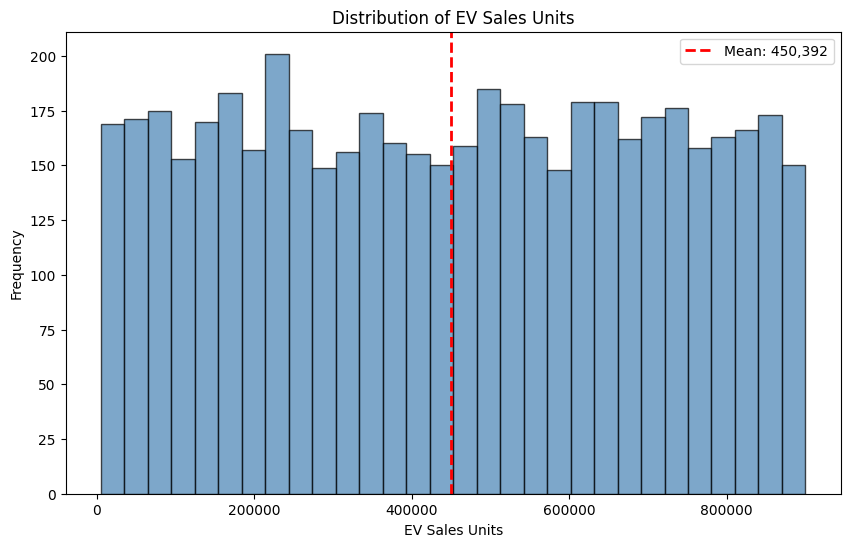

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['ev_sales_units'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('EV Sales Units')
plt.ylabel('Frequency')
plt.title('Distribution of EV Sales Units')
plt.axvline(df['ev_sales_units'].mean(), color='red', linestyle='--',
           linewidth=2, label=f'Mean: {df["ev_sales_units"].mean():,.0f}')
plt.legend()
plt.show()



Text(0.5, 1.0, 'EV_SALES BY VEHICLE TYPE')

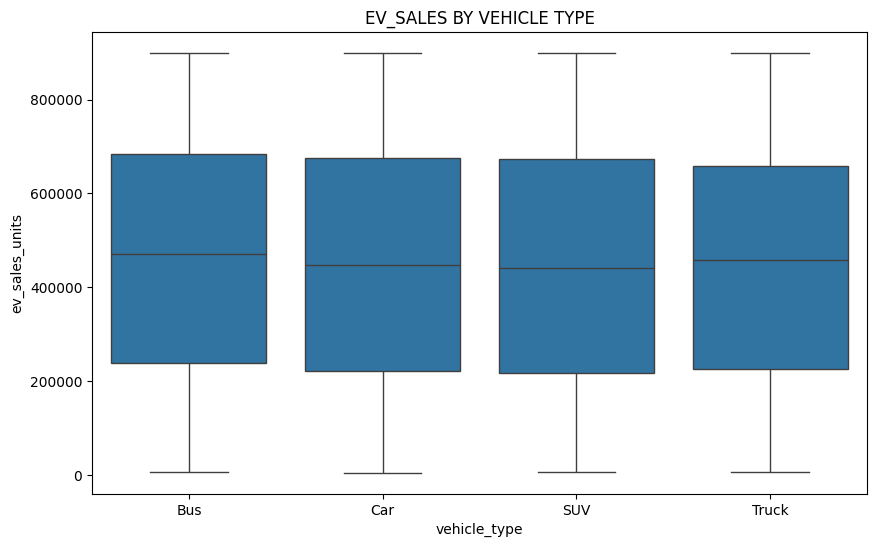

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x='vehicle_type', y = 'ev_sales_units')
plt.title("EV_SALES BY VEHICLE TYPE")


---

##  Correlation Analysis

 correlation matrix reveals linear relationships between numerical variables:
- **Strong positive correlation (0.7 to 1.0):** Variables move together
- **Strong negative correlation (-1.0 to -0.7):** Variables move opposite
- **Weak correlation (-0.3 to 0.3):** Little to no linear relationship


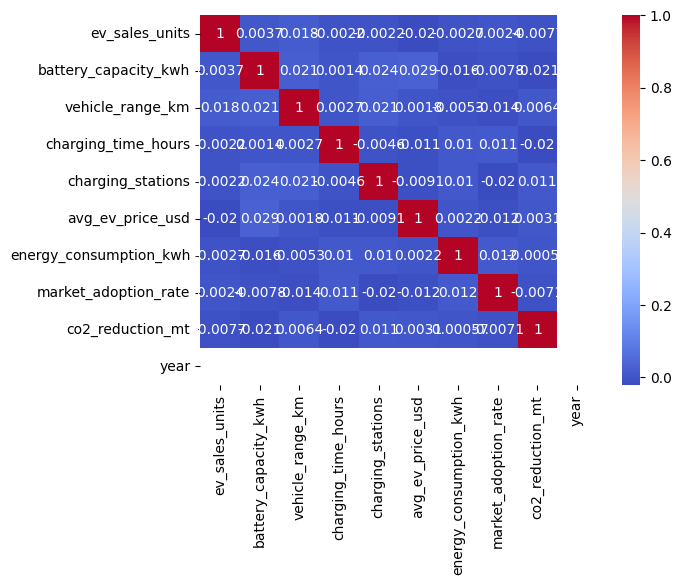

In [ ]:
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()


**BIVARIATE ANALYSIS**

In [ ]:
country_avg = (
    df.groupby('country')['ev_sales_units']
      .mean()
      .sort_values(ascending=False)
)

print(country_avg.head(10))


country
Canada            473074.060998
France            467454.099593
Germany           462877.222453
India             456603.080078
United States     453180.692771
Japan             451005.894632
China             448265.838000
Australia         435684.528487
United Kingdom    428362.625806
Norway            424827.154309
Name: ev_sales_units, dtype: float64


In [ ]:
regional_stats = df.groupby('region')['ev_sales_units'].agg([
    ('total', 'sum'),
    ('average', 'mean'),
    ('median', 'median'),
    ('std_dev', 'std')
])
print(regional_stats)

                   total        average    median        std_dev
region                                                          
Asia           684769661  451993.175578  461368.0  258240.422532
Europe         863808732  445951.849251  443916.0  258810.095024
North America  481617052  463539.029836  482530.0  259395.559249
Oceania        221763425  435684.528487  429993.0  255691.289570


In [ ]:
price_analysis = df.groupby(['region', 'vehicle_type'])['avg_ev_price_usd'].mean()
print(price_analysis)


region         vehicle_type
Asia           Bus             55071.822102
               Car             56309.351706
               SUV             55485.681948
               Truck           56292.913043
Europe         Bus             54954.739514
               Car             55744.200393
               SUV             55875.836364
               Truck           56166.860417
North America  Bus             55520.356846
               Car             55769.218391
               SUV             55003.691729
               Truck           55482.036900
Oceania        Bus             53038.015625
               Car             56595.544000
               SUV             55193.581395
               Truck           56202.259843
Name: avg_ev_price_usd, dtype: float64


In [ ]:
# linear regression
# PURPOSE : To predict vehicle range (km) using battery capacity (kWh)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix,
                             silhouette_score, davies_bouldin_score)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
x = df[['battery_capacity_kwh']].values # independent variable
y = df['vehicle_range_km'].values # dependent variable

In [ ]:
x

array([[ 42],
       [ 50],
       [105],
       ...,
       [ 58],
       [ 91],
       [ 73]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,      # 20% test data
    random_state=42)


In [ ]:
x_train

array([[ 60],
       [ 58],
       [ 96],
       ...,
       [ 89],
       [ 48],
       [112]])

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([451.45863261, 450.36901288, 450.65957814, 449.20675183,
       448.04449078, 450.73221945, 449.20675183, 449.42467578,
       449.93316498, 450.87750209, 452.91145892, 450.07844762,
       450.0058063 , 452.40296971, 449.13411051, 449.0614692 ,
       449.27939315, 451.02278472, 450.15108893, 448.33505604,
       447.46336026, 447.97184947, 451.96712182, 448.62562131,
       451.09542603, 451.31334998, 452.91145892, 448.18977341,
       448.98882788, 448.40769736, 450.15108893, 451.60391524,
       449.93316498, 448.77090394, 448.77090394, 447.46336026,
       449.49731709, 451.82183919, 447.68128421, 448.55297999,
       448.91618657, 448.77090394, 447.82656684, 449.0614692 ,
       447.24543631, 447.60864289, 450.07844762, 449.13411051,
       451.45863261, 452.03976313, 450.51429551, 450.9501434 ,
       447.39071894, 451.67655656, 452.69353497, 448.69826262,
       447.97184947, 449.49731709, 451.09542603, 451.24070866,
       448.77090394, 449.78788235, 449.78788235, 450.65

In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.0010383286064926667
116.42567871951154


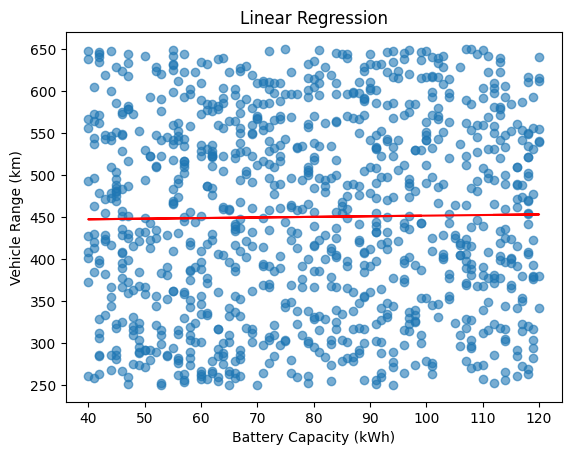

In [ ]:
plt.scatter(x_test, y_test, alpha=0.6)
plt.plot(x_test, y_pred, color='red')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Vehicle Range (km)')
plt.title('Linear Regression')
plt.show()


In [ ]:
# multiple regression

In [ ]:
X = df[['battery_capacity_kwh',
        'vehicle_range_km',
        'avg_ev_price_usd',
        'charging_stations']]

y = df['market_adoption_rate']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,      # 20% test data
    random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([34.02546758, 35.40139373, 34.42304156, 34.16715297, 35.15154323,
       35.01110803, 34.99253234, 34.44509137, 34.69809672, 34.98866728,
       35.47358202, 35.19903036, 35.73362437, 35.7631508 , 34.49804513,
       35.53393986, 35.64428915, 35.38731946, 34.25987749, 36.20711271,
       35.19258502, 34.99526319, 34.40165042, 34.8730572 , 35.22817031,
       34.00642221, 35.58722943, 34.59081889, 36.04419036, 35.23596345,
       35.56519167, 35.24698552, 34.61734214, 34.62835747, 34.22973358,
       36.04393684, 35.00713384, 34.75978942, 35.92606009, 34.71002876,
       35.1932352 , 34.83525496, 34.74742409, 35.49474548, 35.63721649,
       35.04885918, 35.82032841, 33.95477833, 34.2101694 , 35.63902667,
       35.27379447, 35.12629442, 34.91779074, 35.29438571, 34.31823429,
       35.42263114, 35.67505782, 36.13956016, 34.7268729 , 34.7071633 ,
       34.89931779, 35.91551714, 35.48475208, 35.66332462, 35.52898257,
       35.07784423, 33.98471216, 35.64493116, 35.76518605, 35.10

In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

-0.0038146092977684454
17.77003588655845


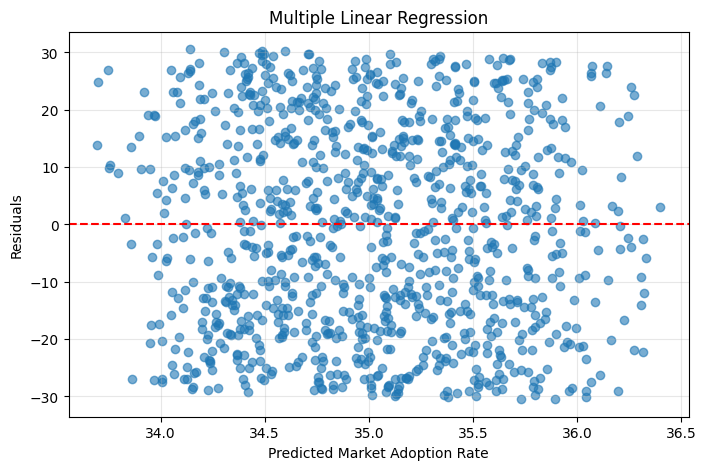

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Market Adoption Rate')
plt.ylabel('Residuals')
plt.title('Multiple Linear Regression')
plt.grid(alpha=0.3)
plt.show()



## Key Insights & ConclusionS

#### 1.Market Distribution
- Global EV market shows high variability between countries
- Mean sales: ~450K units, but wide spread (±258K)
- Relatively balanced distribution (low skewness)

#### 2. **Country Performance**
- Top markets identified through groupby analysis
- Significant differences in adoption rates by region

#### 3. **Infrastructure Insights**
- Correlation between charging stations and EV sales [describe what you found]
- Infrastructure readiness varies significantly

#### 4. **Technical Specifications**
- Battery capacity and range relationships [from correlation]